# **Data Preprocessing**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk import pos_tag
from nltk.util import ngrams
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

df=pd.read_csv('/content/All_train_data.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
df.head()

,input,labels
0,I am reading score of Mahler is Symphony No . .,0
1,I am not interested in cars or electric applia...,1
2,This is my homework for my English class .,0
3,"In comparison , Canada is catches increased an...",0
4,"Fortunately , my older sister is friend is a d...",1


In [5]:
#Checking for missing Values
print("\n Missing values in each column:")
print(df.isnull().sum())


 Missing values in each column:
input     0
labels    0
dtype: int64


In [6]:
#Basic Statistics
print("\n Basic Statistics:")
print(df.describe())


 Basic Statistics:
             labels
count  29998.000000
mean       0.500000
std        0.500008
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000



 Class Distribution:


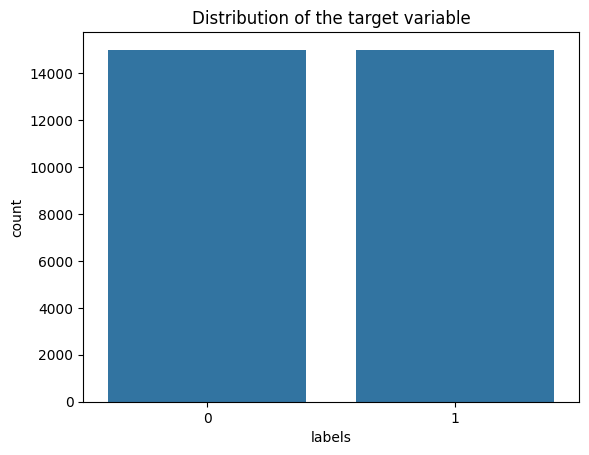

In [7]:
if 'labels' in df.columns:
    print("\n Class Distribution:")
    sns.countplot(x='labels', data=df)
    plt.title('Distribution of the target variable')
    plt.show()

In [8]:
def clean_text(text):
  #Convert to lowercase
  text=text.lower()
  #remove punctuation and special characters
  text=re.sub(r'[^\w\s]','',text)
  #remove numbers
  text=re.sub(r'\d+','',text)
  #remove extra spaces
  text=re.sub(r'\s+',' ',text).strip()
  return text

In [9]:
#Text Cleaning
df['cleaned_text']= df['input'].apply(clean_text)
#Tokenization
df['tokens']=df['cleaned_text'].apply(word_tokenize)
#remove stopwords
stop_words=set(stopwords.words('english'))
df['tokens']=df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
#Lemmatization
lemmatizer=WordNetLemmatizer()
df['tokens']=df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
#Checking the processed data
print("\n Processed Data:")
print(df[['input','cleaned_text','tokens']].head())




 Processed Data:
                                               input  \
0    I am reading score of Mahler is Symphony No . .   
1  I am not interested in cars or electric applia...   
2         This is my homework for my English class .   
3  In comparison , Canada is catches increased an...   
4  Fortunately , my older sister is friend is a d...   

                                        cleaned_text  \
0        i am reading score of mahler is symphony no   
1  i am not interested in cars or electric applia...   
2           this is my homework for my english class   
3  in comparison canada is catches increased and ...   
4  fortunately my older sister is friend is a den...   

                                              tokens  
0                 [reading, score, mahler, symphony]  
1             [interested, car, electric, appliance]  
2                         [homework, english, class]  
3  [comparison, canada, catch, increased, decreas...  
4      [fortunately, older, siste

In [10]:
if 'labels' in df.columns:
    X = df['cleaned_text']
    y = df['labels']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\nTraining and testing data split complete:")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")


Training and testing data split complete:
Training set size: 23998
Testing set size: 6000


In [11]:
df.to_csv('preprocessed_data.csv', index=False)

# **Feature Engineering**


In [12]:
df1=pd.read_csv('/content/preprocessed_data.csv')

df1['tokens']=df1['tokens'].apply(eval)

In [13]:
#Part of Speech tagging
def pos_tagging(tokens):
    return nltk.pos_tag(tokens)


In [14]:
df1['pos_tags'] = df1['tokens'].apply(pos_tagging)
print("\nPOS tagging complete.")
print(df1[['tokens', 'pos_tags']].head())


POS tagging complete.
                                              tokens  \
0                 [reading, score, mahler, symphony]   
1             [interested, car, electric, appliance]   
2                         [homework, english, class]   
3  [comparison, canada, catch, increased, decreas...   
4      [fortunately, older, sister, friend, dentist]   

                                            pos_tags  
0  [(reading, VBG), (score, NN), (mahler, NN), (s...  
1  [(interested, JJ), (car, NN), (electric, JJ), ...  
2       [(homework, NN), (english, JJ), (class, NN)]  
3  [(comparison, NN), (canada, JJ), (catch, NN), ...  
4  [(fortunately, RB), (older, JJR), (sister, NN)...  


In [15]:
#N-grams
def generate_ngrams(tokens, n=2):
    return list(ngrams(tokens, n))
#Generate Bigrams
df1['bigrams'] = df1['tokens'].apply(lambda x: generate_ngrams(x, n=2))
#Generate Trigrams
df1['trigrams'] = df1['tokens'].apply(lambda x: generate_ngrams(x, n=3))

print("\nN-grams generation complete.")
print(df1[['tokens', 'bigrams', 'trigrams']].head())



N-grams generation complete.
                                              tokens  \
0                 [reading, score, mahler, symphony]   
1             [interested, car, electric, appliance]   
2                         [homework, english, class]   
3  [comparison, canada, catch, increased, decreas...   
4      [fortunately, older, sister, friend, dentist]   

                                             bigrams  \
0  [(reading, score), (score, mahler), (mahler, s...   
1  [(interested, car), (car, electric), (electric...   
2            [(homework, english), (english, class)]   
3  [(comparison, canada), (canada, catch), (catch...   
4  [(fortunately, older), (older, sister), (siste...   

                                            trigrams  
0  [(reading, score, mahler), (score, mahler, sym...  
1  [(interested, car, electric), (car, electric, ...  
2                       [(homework, english, class)]  
3  [(comparison, canada, catch), (canada, catch, ...  
4  [(fortunately, old

In [16]:
#Term Frequency- Inverse Document Frequency
df1['cleaned_text']=df1['tokens'].apply(lambda x: ' '.join(x))

#intialize TF-IDF
tfidf_vectorizer=TfidfVectorizer(max_features=5000)
# Fit and Transform the cleaned text
tfidf_matrix=tfidf_vectorizer.fit_transform(df1['cleaned_text'])
#Convert the TF-IDF matrix to a DataFrame
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF feature generation complete.")
print(tfidf_df.head())




TF-IDF feature generation complete.
   abandon  abandoned  abbreviation  abc  ability  able  abnormal  aboard  \
0      0.0        0.0           0.0  0.0      0.0   0.0       0.0     0.0   
1      0.0        0.0           0.0  0.0      0.0   0.0       0.0     0.0   
2      0.0        0.0           0.0  0.0      0.0   0.0       0.0     0.0   
3      0.0        0.0           0.0  0.0      0.0   0.0       0.0     0.0   
4      0.0        0.0           0.0  0.0      0.0   0.0       0.0     0.0   

   abroad  absence  ...  zigzag  zip  zodiac  zoe  zombi  zombie  zone  zoo  \
0     0.0      0.0  ...     0.0  0.0     0.0  0.0    0.0     0.0   0.0  0.0   
1     0.0      0.0  ...     0.0  0.0     0.0  0.0    0.0     0.0   0.0  0.0   
2     0.0      0.0  ...     0.0  0.0     0.0  0.0    0.0     0.0   0.0  0.0   
3     0.0      0.0  ...     0.0  0.0     0.0  0.0    0.0     0.0   0.0  0.0   
4     0.0      0.0  ...     0.0  0.0     0.0  0.0    0.0     0.0   0.0  0.0   

   zoom  zumba  
0   0.0 

In [17]:
#Error Density (ratio of Incorrect words)
def error_density(row):
  error_count=sum([1 for tokens in row['tokens'] if token in row['errors']])
  return error_count/len(row['tokens']) if len(row['tokens'])>0 else 0

In [18]:
df1.to_csv('feature_engineered_data.csv', index=False)
print("\nFeature engineering complete. Dataset saved as 'feature_engineered_data.csv'.")


Feature engineering complete. Dataset saved as 'feature_engineered_data.csv'.


# **Model Selection**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [20]:
df2= pd.read_csv('/content/Feature_Engineered_GED_Data.csv')

In [21]:
X= df2.drop(columns=['labels'])
y=df2['labels']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X['input'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

In [25]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  return accuracy, precision, recall, f1


In [26]:
for model_name, model in models.items():
  accuracy , precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
  print(f"{model_name} Results:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}\n")

Logistic Regression Results:
Accuracy: 0.3918
Precision: 0.3920
Recall: 0.3918
F1 Score: 0.3916

Random Forest Results:
Accuracy: 0.2413
Precision: 0.2413
Recall: 0.2413
F1 Score: 0.2411

Support Vector Machine Results:
Accuracy: 0.2843
Precision: 0.2840
Recall: 0.2843
F1 Score: 0.2838

Naive Bayes Results:
Accuracy: 0.3720
Precision: 0.3716
Recall: 0.3720
F1 Score: 0.3717



In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV with the RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='f1_weighted')

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (model) from the grid search

best_model = grid_search.best_estimator_


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the parameter grid for GridSearchCV (alpha is the main parameter for tuning)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

# Initialize GridSearchCV with the MultinomialNB
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=3, scoring='f1_weighted')

# Fit the model using the training data
grid_search_nb.fit(X_train, y_train)

# Get the best estimator (model) from the grid search
best_nb_model = grid_search_nb.best_estimator_

# Make predictions on the test set
y_pred_nb = best_nb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Print evaluation results
print("Best Multinomial Naive Bayes Model Results:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Best Multinomial Naive Bayes Model Results:
Accuracy: 0.3862
Precision: 0.3858
Recall: 0.3862
F1-Score: 0.3859

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.36      0.37      2954
           1       0.40      0.41      0.40      3046

    accuracy                           0.39      6000
   macro avg       0.39      0.39      0.39      6000
weighted avg       0.39      0.39      0.39      6000



In [29]:

y_pred_best = best_model.predict(X_test)
print("Best Model (Random Forest) Results After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Best Model (Random Forest) Results After Hyperparameter Tuning:
Accuracy: 0.4510
Precision: 0.4414
Recall: 0.4510
F1-Score: 0.4191

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.69      0.55      2954
           1       0.42      0.22      0.29      3046

    accuracy                           0.45      6000
   macro avg       0.44      0.45      0.42      6000
weighted avg       0.44      0.45      0.42      6000



# **FlowChart**

In [31]:
# Install the necessary library if not already installed
!pip install graphviz

from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add nodes for each step in the workflow
dot.node('A', 'Dataset\n(Data with correct and incorrect grammar)')
dot.node('B', 'Data Preprocessing\n(Text cleaning, tokenization, stopwords removal, lemmatization)')
dot.node('C', 'Feature Extraction\n(TF-IDF Vectorization)')
dot.node('D', 'Model Training\n(Random Forest Classifier)')
dot.node('E', 'Output\n(Classification Report with Accuracy, Precision, Recall, F1-score)')

# Define the edges (connections) between the steps
dot.edge('A', 'B', label='Data Processing')
dot.edge('B', 'C', label='Extract Features')
dot.edge('C', 'D', label='Train Model')
dot.edge('D', 'E', label='Evaluate Model')

# Render the flowchart and display it
dot.render('nlp_workflow_1', format='png', view=True)


'nlp_workflow_1.png'